In [51]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import decomposition
from sklearn.model_selection import cross_val_score

In [52]:
df = pd.read_csv('KeplerData.csv')
target_name = 'Exoplanet Archive Disposition'
# can't include these columns because they are all null
invalids = ['Equilibrium Temperature Upper Uncertainty [K]', 'Equilibrium Temperature Lower Uncertainty [K]']
# these are all the features
feature_names = list(set(df.columns[4:]) - set(invalids))
data = df[feature_names + [target_name]].dropna()
features = data[feature_names]
target = data[target_name]

In [53]:
important = ['Disposition Score',
 'Centroid Offset False Positive Flag',
 'Planetary Radius [Earth radii]',
 'Planetary Radius Upper Uncertainty [Earth radii]',
 #'Ephermeris Match Indicates Contamination',
 'Transit Signal-to-Noise',
 'Transit Depth [ppm]',
 'Number of Planets',
 'Maximum Multiple Event Statistic',
 'Not Transit-Like False Positive Flag']
features = data[important]

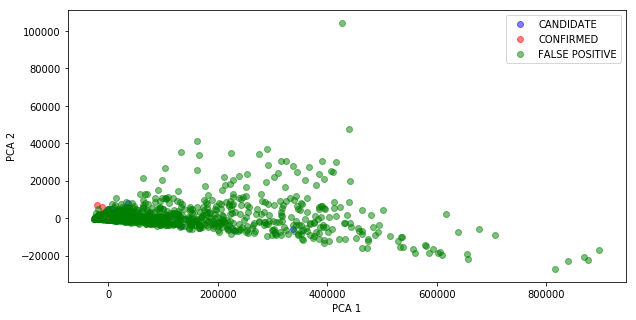

In [54]:
iris = np.array(features)
species = target
iris_colors = {'CANDIDATE': 'b', 'FALSE POSITIVE': 'g', 'CONFIRMED': 'r'}

pca = decomposition.PCA(n_components=2)
pca.fit(iris)
iris_pca = pca.transform(iris)

# projected coordinates
fig, ax = plt.subplots(figsize = (10, 5))
for specie in np.unique(species):
    mask = (species == specie)
    ax.scatter(iris_pca[mask][:, 0], iris_pca[mask][:, 1], label = specie, c = iris_colors[specie], alpha = 0.5)

# loading vectors
eviris = 2. * pca.components_
for idx, var in enumerate(features.columns[:-1]):
    ax.plot([0, eviris[0, idx]], [0, eviris[1, idx]])
    #ax.text(eviris[0, idx], eviris[1, idx], var)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.legend();

In [55]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


# preprocess dataset, split into training and test part
X, y = features, target
#X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

In [56]:
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cv_scores_rf = cross_val_score(clf, X_test, y_test, cv=5)
    print(name)
    print("Accuracy:\t\t", np.mean(cv_scores_rf))
    print("Completeness:\t\t", sklearn.metrics.recall_score(y_test, y_pred, average='micro'))
    print("Contamination:\t\t", 1 - sklearn.metrics.precision_score(y_test, y_pred, average='micro'))
    print('\n\n')

Nearest Neighbors
Accuracy:		 0.5891525140980418
Completeness:		 0.6101900525677315
Contamination:		 0.3898099474322685





KeyboardInterrupt: 

IndentationError: expected an indented block (<ipython-input-24-ec0df306790c>, line 17)